# Euler Method

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
step = 0.5
x = np.arange(-10, 10, step)
y = np.exp(0.1*x)

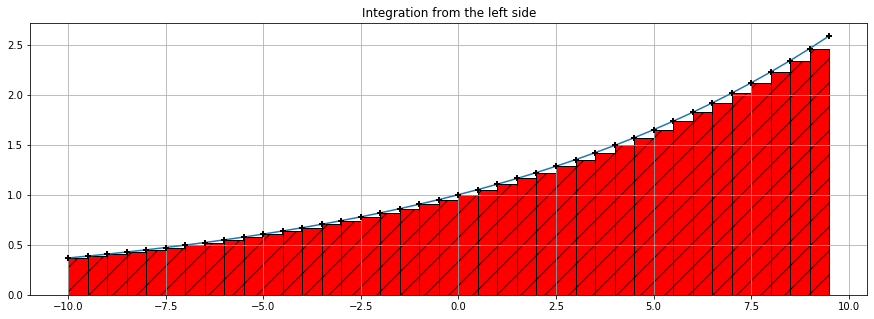

In [42]:
plt.figure(figsize=(15, 5))
plt.plot(x, y)
plt.plot(x, y, "k+", markeredgewidth=2)
plt.bar(x[:-1], y[:-1], width=step, align="edge", color='red', edgecolor='black', hatch="/")
plt.title("Integration from the left side")
plt.grid()

We want to find a numerical solution (i.e. the shape of $x(t)$ given following equation.

\begin{align}
\dot{x}(t) + a_1x(t) = b_0 + b_1u(t)
\end{align}

We rewrite it to have the first derivative on the left side:

\begin{align}
\dot{x}(t) = b_0 + b_1u(t) - a_1x(t)
\end{align}

Given initial value for $x(t=0)$ we can derive $x(t)$ by integrating

\begin{align}
x(t) = \int_{\tau=0}^{t}[b_0 + b_1u(t) - a_1x(t)] \text{d}\tau
\end{align}

We can approximate above equation using small steps $T$:

\begin{align}
x(k+1) = T\sum_{i=0}^{k}b_0 + b_1u(i) - a_1x(i)
\end{align}

We can do that incrementally too (rectangle method from the left side):

\begin{align}
x(k+1) \approx x(k) + T\left[b_0 + b_1u(k) - a_1x(k)\right]
\end{align}

In [2]:
# step function
def u(t):
    if t>0:
        return 1
    else:
        return 0

In [3]:
T=1e-3

In [4]:
b0, b1, a1 = 1, 2, 1

In [5]:
t_sim = np.arange(0, 2, T)
x_t = np.zeros_like(t_sim)
n_steps = t_sim.size

In [6]:
x_k = 0
for i in range(n_steps):
    x_t[i] = x_k + T*(b0 + b1*u(i)+x_k)
    x_k = x_t[i]

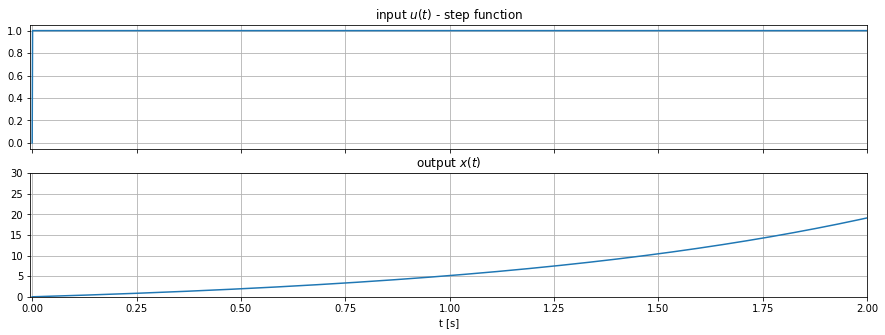

In [7]:
fig, ax = plt.subplots(nrows=2, figsize=(15, 5), sharex=True)
ax[0].plot(t_sim, [u(t) for t in range(len(t_sim))])
ax[0].set_title("input $u(t)$ - step function")
ax[0].grid(True)
ax[1].plot(t_sim, x_t)
ax[1].set_title("output $x(t)$")
ax[-1].set_xlabel("t [s]")
ax[-1].set_xlim([-5e-3, 2])
ax[-1].set_ylim([0, 30])
ax[-1].grid(True)